In [1]:
# Data import

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [13]:
df = pd.read_csv("Data/Multi Timeline Data for fitness goal.csv")

In [14]:
df.head()

Month  diet: (Worldwide)  gym: (Worldwide)  finance: (Worldwide)
0  2004-01                100                31                    48
1  2004-02                 75                26                    49
2  2004-03                 67                24                    47
3  2004-04                 70                22                    48
4  2004-05                 72                22                    43

In [15]:
df.describe()

diet: (Worldwide)  gym: (Worldwide)  finance: (Worldwide)
count         168.000000        168.000000            168.000000
mean           49.642857         34.690476             47.148810
std             8.033080          8.134316              4.972547
min            34.000000         22.000000             38.000000
25%            44.000000         28.000000             44.000000
50%            48.500000         32.500000             46.000000
75%            53.000000         41.000000             50.000000
max           100.000000         58.000000             73.000000

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


In [17]:
### Data Wrangling

In [18]:
df.head()

Month  diet: (Worldwide)  gym: (Worldwide)  finance: (Worldwide)
0  2004-01                100                31                    48
1  2004-02                 75                26                    49
2  2004-03                 67                24                    47
3  2004-04                 70                22                    48
4  2004-05                 72                22                    43

In [19]:
df.columns

Index(['Month', 'diet: (Worldwide)', 'gym: (Worldwide)',
       'finance: (Worldwide)'],
      dtype='object')

In [20]:
df.columns = ['Month', 'Diet', 'Gym', 'Finance']

In [21]:
df.head()

Month  Diet  Gym  Finance
0  2004-01   100   31       48
1  2004-02    75   26       49
2  2004-03    67   24       47
3  2004-04    70   22       48
4  2004-05    72   22       43

In [22]:
df['Month'] = pd.to_datetime(df['Month'])

In [23]:
df.head()

Month  Diet  Gym  Finance
0 2004-01-01   100   31       48
1 2004-02-01    75   26       49
2 2004-03-01    67   24       47
3 2004-04-01    70   22       48
4 2004-05-01    72   22       43

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month      168 non-null datetime64[ns]
Diet       168 non-null int64
Gym        168 non-null int64
Finance    168 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.3 KB


In [25]:
df.set_index('Month', inplace=True)

In [26]:
df.head()

Diet  Gym  Finance
Month                         
2004-01-01   100   31       48
2004-02-01    75   26       49
2004-03-01    67   24       47
2004-04-01    70   22       48
2004-05-01    72   22       43

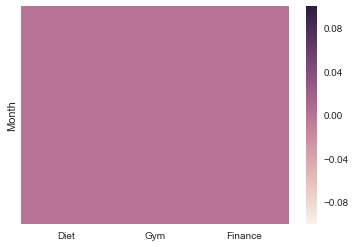

In [27]:
## check null data
sns.heatmap(df.isnull(), yticklabels=False)

# as no null data so no treatment is needed

In [28]:
### Exploratory Data Analysis

Text(0.5,1,'Health Trend Vs Time')

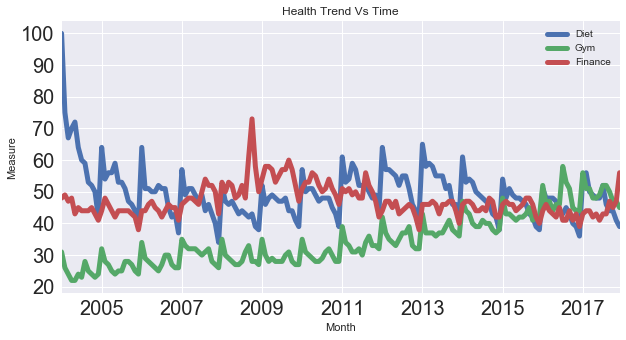

In [29]:
df.plot(figsize=(10,5), linewidth = 5, fontsize = 20)
plt.ylabel('Measure')
plt.title('Health Trend Vs Time')

Text(0.5,1,'Diet Vs Time')

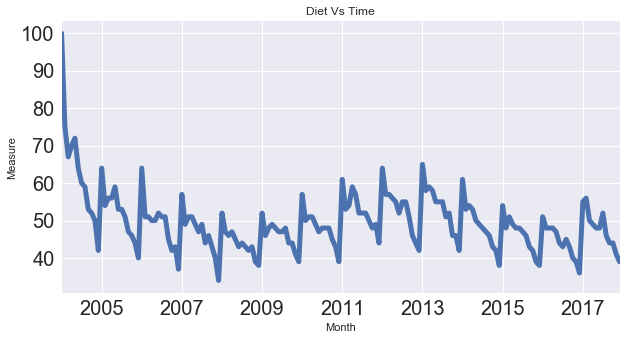

In [30]:
df['Diet'].plot(figsize=(10,5), linewidth = 5, fontsize = 20)
plt.ylabel('Measure')
plt.title('Diet Vs Time')

In [31]:
## Trends and Seasonality in Time Series Data

In [32]:
df_diet = df[['Diet']]

In [33]:
## ensuring there is data frame object as two brackets
df_diet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 1 columns):
Diet    168 non-null int64
dtypes: int64(1)
memory usage: 2.6 KB


Text(0.5,1,'Rolled Monthly Means Vs Time')

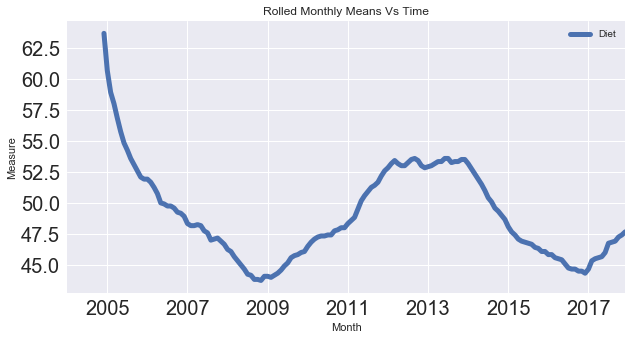

In [34]:
## taking numpy rolling mean which is for each time point, you take the average of the points on either side of it, 
## for the window size selected by you. This average tends to smooth out noise and seasonality. 
df_diet.rolling(12).mean().plot(figsize = (10,5), linewidth = 5, fontsize = 20)
plt.ylabel('Measure')
plt.title('Rolled Monthly Means Vs Time')

In [35]:
## removed seasonablity from the trend as compared to previous plot

In [36]:
## now remove seasonablity from 'Gym'

In [37]:
df_gym = df[['Gym']]

In [38]:
df_gym.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 1 columns):
Gym    168 non-null int64
dtypes: int64(1)
memory usage: 2.6 KB


Text(0,0.5,'Measure')

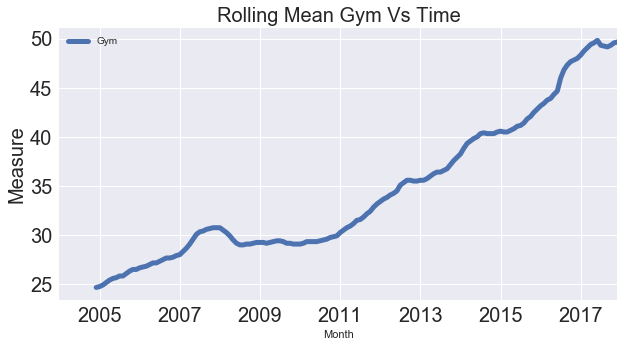

In [39]:
df_gym.rolling(12).mean().plot(figsize = (10,5), linewidth = 5, fontsize = 20)
plt.title('Rolling Mean Gym Vs Time', fontsize =20)
plt.ylabel('Measure', fontsize= 20)

In [40]:
### upward trend in Gym

In [41]:
### plot both Diet and Gym trend on one map

In [42]:
df_diet_gym = pd.concat( [df_diet.rolling(12).mean(), df_gym.rolling(12).mean()], axis = 1)


Text(0.5,1,'Combined Trend')

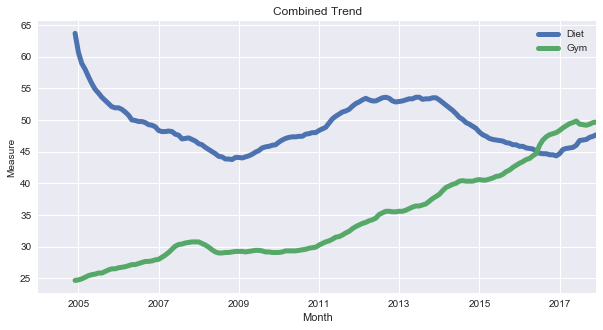

In [43]:
df_diet_gym.plot(figsize = (10,5), linewidth = 5, fontsize = 10 )
plt.ylabel('Measure', fontsize = 10)
plt.title('Combined Trend')

In [44]:
### diet potentially has some form of seasonality, whereas gym is actually increasing!

In [45]:
df.corr()

Diet       Gym   Finance
Diet     1.000000 -0.100764 -0.034639
Gym     -0.100764  1.000000 -0.284279
Finance -0.034639 -0.284279  1.000000

In [46]:
## diet and gym are negatively correlated
## However, from looking at the times series,
## it looks as though their seasonal components would be positively correlated and their trends negatively correlated
## The actual correlation coefficient is actually capturing both of those.

## So plot the first-order differences of these time series and then compute the correlation of those because that will be 
## the correlation of the seasonal components, approximately. Remember that removing the trend may reveal correlation 
## in seasonality

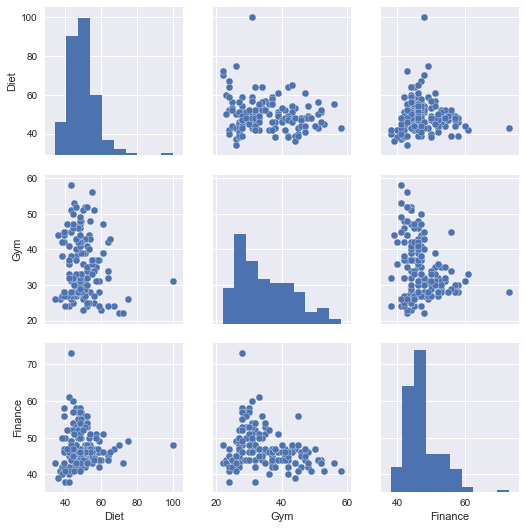

In [47]:
sns.pairplot(df)

In [48]:
### see seasonal patterns
## Method to remove the trend is called "differencing", where you look at the difference between successive data points
## (called "first-order differencing", because you're only looking at the difference between one data point and the one 
## before it)

In [49]:
### First-order differencing

Text(0.5,1,'First Order Difference')

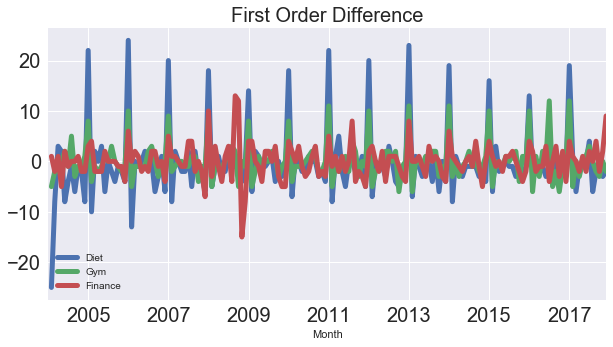

In [50]:
df.diff().plot(figsize = (10,5), linewidth = 5,fontsize = 20)
plt.title('First Order Difference', fontsize = 20)

In [51]:
## looks like Diet and Gym are highly correlated
## check correlation of first order differnce

In [52]:
df.diff().corr()

Diet       Gym   Finance
Diet     1.000000  0.758707  0.373828
Gym      0.758707  1.000000  0.301111
Finance  0.373828  0.301111  1.000000

In [53]:
## it show there exists correlation between Diet and Gym with coefficent of .76

In [54]:
### AutoCorrelation

In [55]:
### plot the autocorrelation of the 'diet' series: on the x-axis, you have the lag and on the y-axis, you have how correlated the
### time series is with itself at that lag.

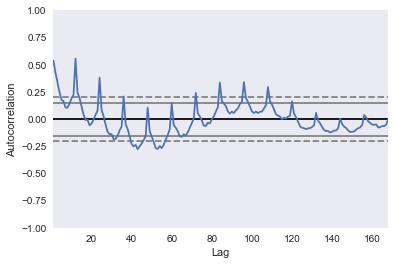

In [56]:
pd.plotting.autocorrelation_plot(df_diet)

In [57]:
### In this case, you can say that the 'diet' series is genuinely autocorrelated with a lag of twelve months.

### You have identified the seasonality of this 12 month repetition!

In [58]:
from pandas.plotting import lag_plot

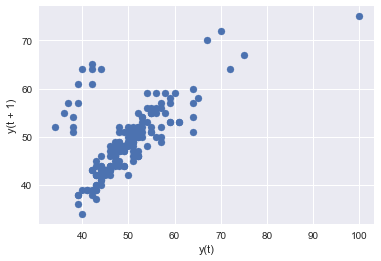

In [59]:
lag_plot(df_diet)

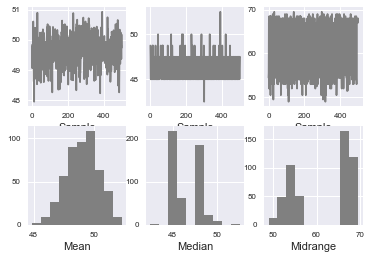

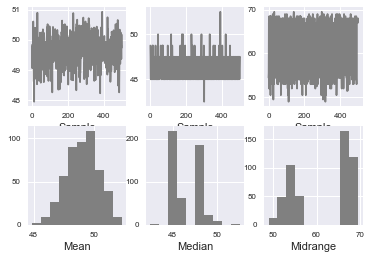

In [74]:
from pandas.plotting import bootstrap_plot
bootstrap_plot(  df_diet, size = 100, samples = 500, color ='grey')